# Daily Gas Demand Ireland

## Dataset description

This dataset provides daily gas demand data for Ireland, covering various sectors and categories. The metric for the data is **GWh** (Gigawatt-hours) The columns represent:

**Date**: The date for each entry in the dataset.

**Daily Metered**: Gas consumption by large consumers who are metered on a daily basis (consume over 5.55 GWh annually).

**Non Daily Metered (NDM)**: Gas consumption by small to medium businesses and residential properties, which typically consume less than 5.55 GWh annually.

**Large Daily Metered (LDM) non Power Gen:** Gas consumption by large industrial users (excluding power generation), such as pharmaceutical, agri-food, and manufacturing sectors (consume over 5.55 GWh annually).

**Power Generation:** Gas used in gas-fired thermal power generation, which fluctuates depending on electricity demand and renewable generation conditions.

**Total ROI demand:** The total gas demand in the Republic of Ireland, combining all the above sectors.

In [9]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

In [10]:
data = pd.read_csv("https://www.gasnetworks.ie/corporate/open-data/2024-Q3-Daily-Gas-Demand.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     2465 non-null   object 
 1   Daily Metered                            2465 non-null   float64
 2   Non Daily Metered (NDM)                  2465 non-null   float64
 3   Large Daily Metered (LDM) non Power Gen  2465 non-null   float64
 4   Power Generation                         2465 non-null   float64
 5   Total ROI demand                         2465 non-null   float64
dtypes: float64(5), object(1)
memory usage: 115.7+ KB


,Date,Daily Metered,Non Daily Metered (NDM),Large Daily Metered (LDM) non Power Gen,Power Generation,Total ROI demand
0,01/01/2018,7.251362,55.409405,9.494423,57.062501,129.217691
1,02/01/2018,9.541429,57.607694,10.575758,54.855833,132.580714
2,03/01/2018,10.481540,60.505595,12.308507,69.217500,152.513142
3,04/01/2018,10.576218,59.123724,13.310019,96.651666,179.661627
4,05/01/2018,10.683822,62.322325,13.327011,100.158333,186.491491


- The dataset contains no missing values.<br>
- The data in the **Date** column is in an object format and needs to be converted to a datetime format.<br>
- All other columns contain data in float format.

In [11]:
# Renaming columns:

# Daily Metered = `l_business`
# Non-Daily Metered (NDM) = `xs_business_houses`
# Large Daily Metered (LDM) non Power Gen = `xl_business`
# Power Generation = `power_gen`
# Total ROI demand = `total`

data.columns = ['date','l_business','xs_business_houses','xl_business','power_gen','total']

In [12]:
# Rounding the data to 2 decimal places
data = data.round(2)

# Formatting the date column
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Statistical summary of the data
data.describe()

,date,l_business,xs_business_houses,xl_business,power_gen,total
count,2465,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,2021-05-17 00:00:00,9.039943,31.291124,16.196114,95.585168,152.112373
min,2018-01-01 00:00:00,4.380000,6.530000,5.120000,36.550000,71.690000
25%,2019-09-09 00:00:00,7.700000,12.650000,14.900000,78.220000,132.720000
50%,2021-05-17 00:00:00,8.810000,28.980000,16.420000,96.610000,151.470000
75%,2023-01-23 00:00:00,10.480000,47.590000,17.800000,113.100000,170.450000
max,2024-09-30 00:00:00,14.030000,97.230000,21.970000,161.180000,261.450000
std,NaN,1.863845,18.894646,2.390391,23.975290,29.298692


* **Time Span:** The dataset spans from January 1, 2018, to September 30, 2024, covering daily gas demand data for Ireland over 2,465 days.

* **Small business and households**(`xs_business_houses`): demonstrates high variability (std: 18.89 GWh).

* **Power Generation plants** (`power_gen`) also has significant variation (std: 23.98 GWh).

* **Large business, manufacturing, and industrial sectors** (`l_business` and `xl_business`) show more stable gas demand because many of these sites have consistent gas usage throughout the year.

In [13]:
#data_2020 = data[data['date'].dt.year == 2020]

Ref.[distance between title and plot](https://stackoverflow.com/questions/16419670/increase-distance-between-title-and-plot-in-matplolib)

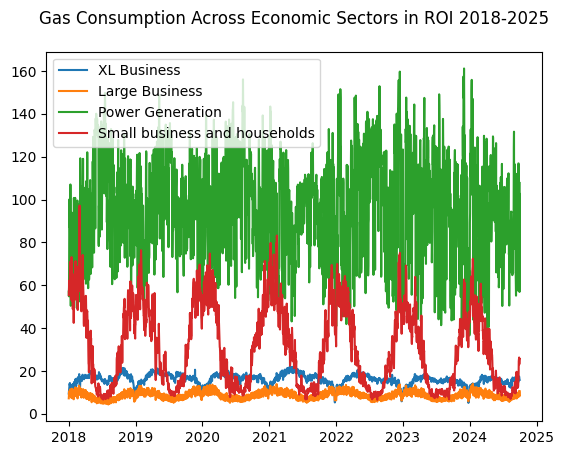

In [14]:
fig,ax =plt.subplots()
ax.plot(data['date'],data['xl_business'], label='XL Business')
ax.plot(data['date'],data['l_business'], label='Large Business')
ax.plot(data['date'],data['power_gen'], label='Power Generation')
ax.plot(data['date'],data['xs_business_houses'], label='Small business and households')
ax.legend()

# `pad=20` increases the distance between the title and the plot
plt.title("Gas Consumption Across Economic Sectors in ROI 2018-2025", pad=20)
plt.show()

In [15]:
#Filtering data
consumers_share = data[['l_business','xl_business','power_gen','xs_business_houses']].sum()
consumers_share

l_business             22283.46
xl_business            39923.42
power_gen             235617.44
xs_business_houses     77132.62
dtype: float64

### Gas Consumption by Economic Sector in the Republic of Ireland (2018–2025)

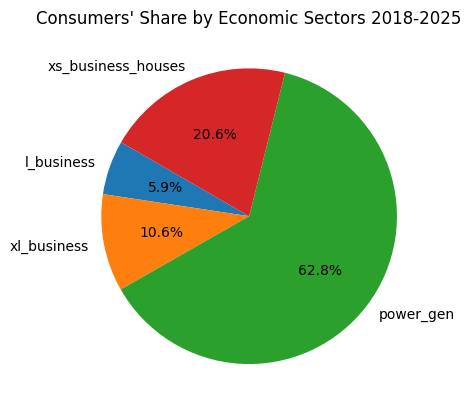

In [16]:
# Pie chart
labels= consumers_share.index
share = consumers_share.values

plt.figure()
plt.pie(share,labels=labels, autopct='%1.1f%%',startangle=150)
plt.title("Consumers' Share by Economic Sectors 2018-2025")
plt.show()